# RGB与CIE_LAB

## RGB转换LAB
RGB无法直接转换成LAB，需要先转换成XYZ再转换成LAB，即：RGB——XYZ——LAB

1) 首先将RGB转换成XYZ，可以参考[颜色空间转换-rgb与XYZ]

2) XYZ转换成LAB

假设r,g,b为像素三个通道，取值范围均为[0,255]，转换公式如下：
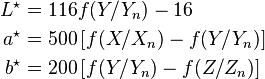
其中函数f的表达式如下：

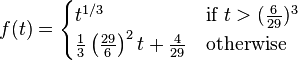
上面两个公式中，L*，a*，b*是最终的LAB色彩空间三个通道的值。X，Y，Z是RGB转XYZ后计算出来的值，Xn，Yn，Zn一般默认是95.047，100.0，108.883

javascript代码参考如下：
```javascript
//Reference-X, Y and Z refer to specific illuminants and observers.
//Common reference values are available below in this same page.

var_X = X / Reference-X
var_Y = Y / Reference-Y
var_Z = Z / Reference-Z

if ( var_X > 0.008856 ) var_X = var_X ^ ( 1/3 )
else                    var_X = ( 7.787 * var_X ) + ( 16 / 116 )
if ( var_Y > 0.008856 ) var_Y = var_Y ^ ( 1/3 )
else                    var_Y = ( 7.787 * var_Y ) + ( 16 / 116 )
if ( var_Z > 0.008856 ) var_Z = var_Z ^ ( 1/3 )
else                    var_Z = ( 7.787 * var_Z ) + ( 16 / 116 )

CIE-L* = ( 116 * var_Y ) - 16
CIE-a* = 500 * ( var_X - var_Y )
CIE-b* = 200 * ( var_Y - var_Z )
```

## LAB转换RGB
LAB无法直接转换成RGB，需要将LAB转换成XYZ，然后再转换成RGB，即：LAB--XYZ--RGB

1) 首先将LAB转换成XYZ
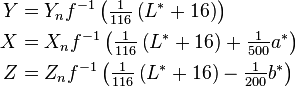

其中，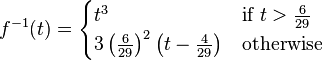

2) XYZ转换RGB，可以参考[颜色空间转换-rgb与XYZ]

javascript代码参考如下
```javascript
//Reference-X, Y and Z refer to specific illuminants and observers.
//Common reference values are available below in this same page.

var_Y = ( CIE-L* + 16 ) / 116
var_X = CIE-a* / 500 + var_Y
var_Z = var_Y - CIE-b* / 200

if ( var_Y^3  > 0.008856 ) var_Y = var_Y^3
else                       var_Y = ( var_Y - 16 / 116 ) / 7.787
if ( var_X^3  > 0.008856 ) var_X = var_X^3
else                       var_X = ( var_X - 16 / 116 ) / 7.787
if ( var_Z^3  > 0.008856 ) var_Z = var_Z^3
else                       var_Z = ( var_Z - 16 / 116 ) / 7.787

X = var_X * Reference-X
Y = var_Y * Reference-Y
Z = var_Z * Reference-Z
```


参考：

[1]. https://www.cnblogs.com/hrlnw/p/4126017.html

[2]. http://www.cnblogs.com/Imageshop/archive/2013/02/02/2889897.html

[3]. http://www.easyrgb.com/en/math.php